In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn as sns

## Data Analysis and Exploration

In [2]:
train_nsl_kdd_dataset_path = "NSL_KDD_Dataset/KDDTrain+.txt"
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels"])

categoricalColumns = col_names[[1,2,3]]
binaryColumns = col_names[[6, 11, 13, 14, 20, 21]]
numericColumns = col_names[list(set(range(41)) - set([1,2,3]) - set([6, 11, 13, 14, 20, 21]))]

train = pd.read_csv(train_nsl_kdd_dataset_path, header=None)
train.drop([42], 1, inplace=True)
train.columns = col_names
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
# Dictionary that contains mapping of various attacks to the four main categories
attack_dict = {
    'normal': 'normal',
   
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

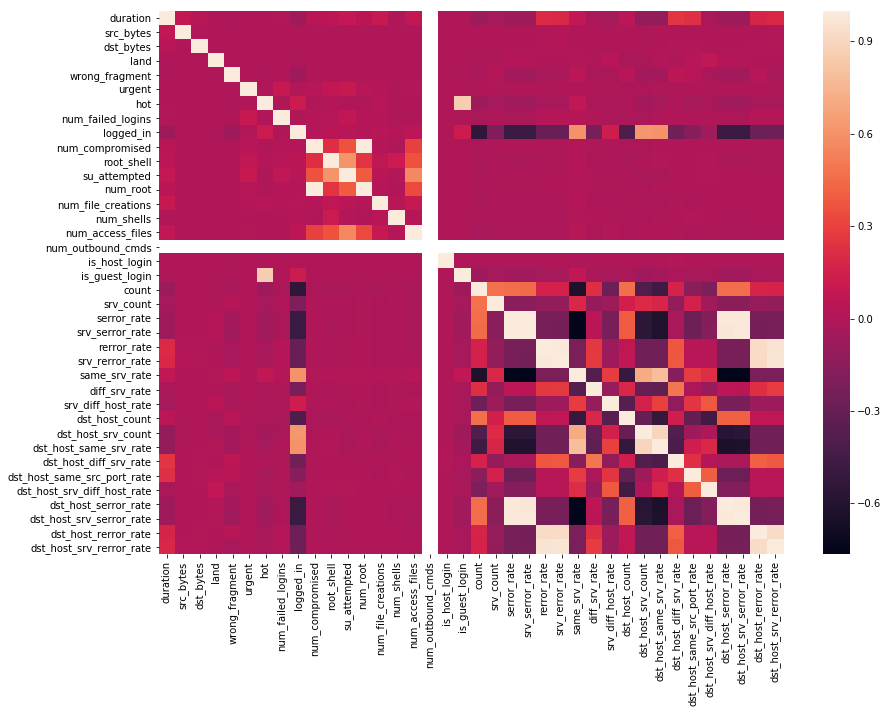

In [5]:
plt.figure(figsize=(14, 10))
sns.heatmap(train.corr())

There is an unsually high correlation among the feature sets, this should mean that most of the feature have similar values and based on papers read on this dataset it seems like a lot of features are predominantly 0. But first lets get an idea on the the types of attacks we have in our training dataset

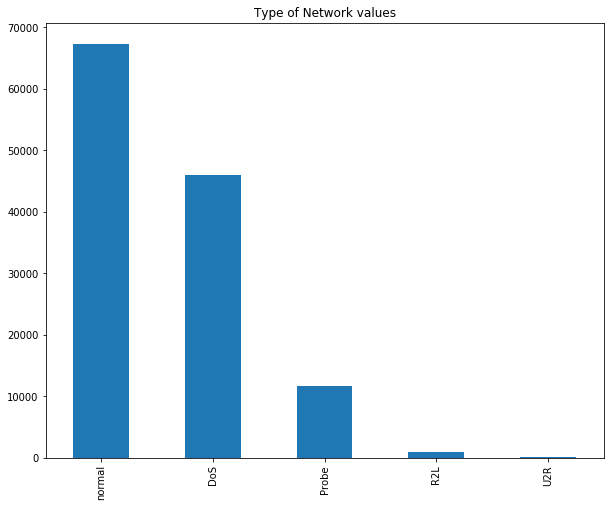

In [6]:
plt.figure(figsize=(10, 8))
train['labels'].map(lambda x: attack_dict[x]).value_counts().plot.bar(title='Type of Network values')

In [7]:
trainDescribe = train[numericColumns].describe()
trainDescribe.T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03
num_root,125973.0,0.302192,2.439962e+01,0.0,0.00,0.00,0.00,7.468000e+03
num_file_creations,125973.0,0.012669,4.839351e-01,0.0,0.00,0.00,0.00,4.300000e+01


Columns of interest:
For each of these columns we should check how much of the data is 0
1. wrong_fragment
2. urgent
3. num_failed_logins
4. num_shells
5. num_access_files
6. num_outbound_cmds
7. rerror_rate
8. srv_rerror_rate
9. srv_diff_host_rate
10. dst_host_serror_rate
11. dst_host_same_src_port_rate
12. dst_host_rerror_rate
13. dst_host_srv_rerror_rate

In [8]:
cols_to_check = ['wrong_fragment', 'urgent', 'num_failed_logins', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                 'rerror_rate', 'srv_rerror_rate', 'srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_same_src_port_rate',
                'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
train[cols_to_check].quantile([0.8, 0.95])

,wrong_fragment,urgent,num_failed_logins,num_shells,num_access_files,num_outbound_cmds,rerror_rate,srv_rerror_rate,srv_diff_host_rate,dst_host_serror_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,1.0,0.15,0.0,0.0
0.95,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.0,1.00,1.0,1.0


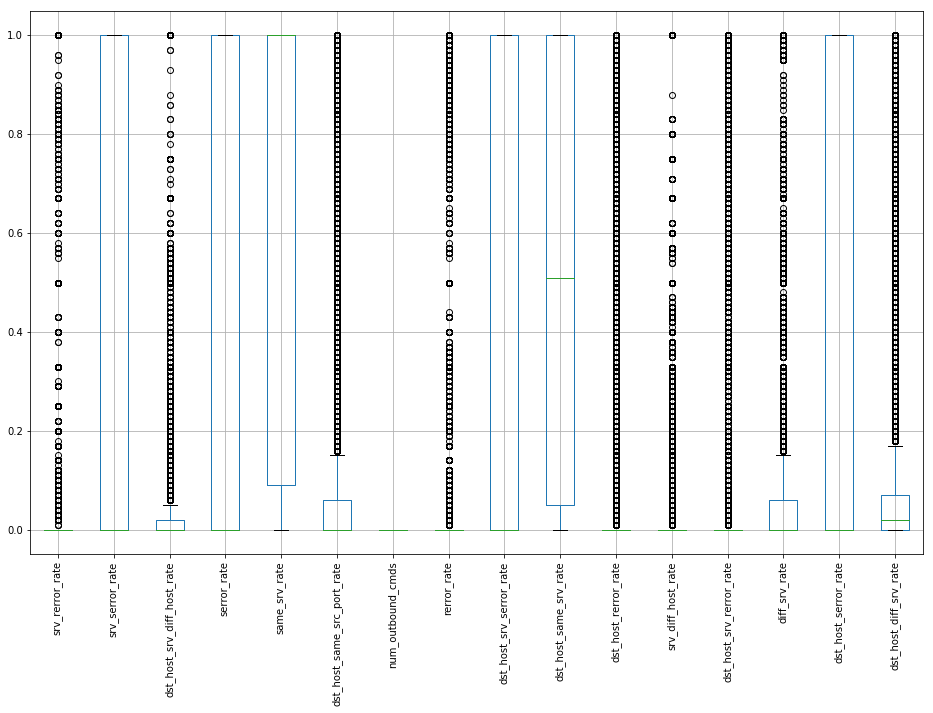

In [9]:
plt.figure(figsize=(16, 10))
colsWithMaxLessThan1 = list(set(trainDescribe.columns) -  set(trainDescribe.T[trainDescribe.T['max'] > 1].T.columns))
train.boxplot(colsWithMaxLessThan1, rot=90)

A lot of values seem to have a lot of zeros as most of the non zero values in many of the features are deemed as outliers as per the box plot. Lets look at the ones where the max is actually greater than 1

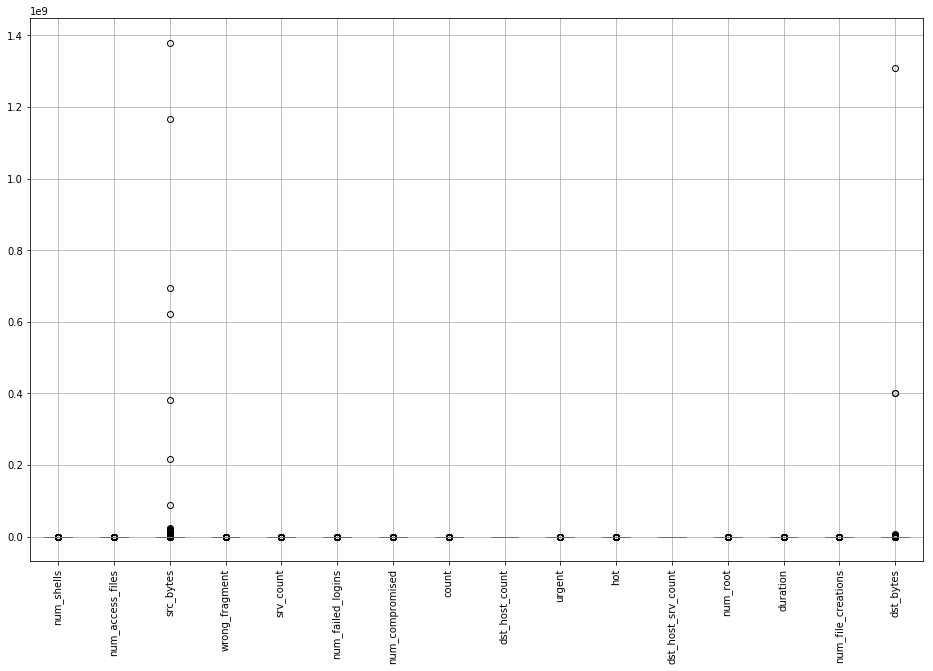

In [10]:
#Plot of columns with max > 1
plt.figure(figsize=(16, 10))
colsWithMaxMoreThan1 = list(set(trainDescribe.T[trainDescribe.T['max'] > 1].T.columns))
train.boxplot(colsWithMaxMoreThan1, rot=90)

For some of the features the max value is really big, it should make sense to normalize the features before passing it into any of the distance based methods. Lets also look at the features with not so high values after removing the high max value features

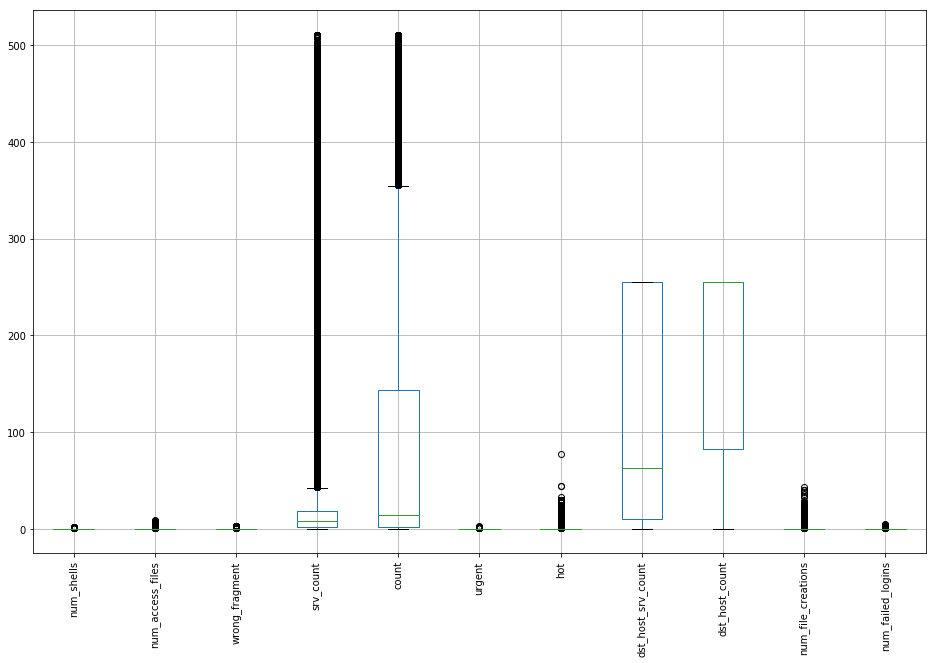

In [11]:
plt.figure(figsize=(16, 10))
train.boxplot(list(set(trainDescribe.T[trainDescribe.T['max'] > 1].T.columns) - set(['src_bytes', 'dst_bytes','duration', u'num_compromised', 'num_root'])), rot=90)

Same as the ones with max value less than 1, a lot of values are considered as outliers by the box plot. There being so many outliers it makes sense to cluster these data points together and look at the data generated but before that, we need to perform some other data processing namely the following:
1. Categorical to numerical features
2. Feature Selection
3. Data Normalization
4. Data Visualization using PCA and SVD

## Categorical to numeric features
The most common way to convert categorical features to numeric ones is to do One hot encoding. The problem with that over here is that 2 of the 3 categorical columns have very high number of categories , 11 and 70(check) respectively. So what we are doing is to one hot encode the protocol column and label encode the other 2 columns 

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
enc = LabelEncoder()
#
def encodeCategorical(ser):
    return enc.fit_transform(ser)

train['service'] = encodeCategorical(train['service'])
train['flag'] = encodeCategorical(train['flag'])
train_processed = pd.get_dummies(train, columns=['protocol_type'])
train_processed.head() 

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,20,9,491,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,0,1,0
1,0,44,9,146,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,0,0,1
2,0,49,5,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0,1,0
3,0,24,9,232,8153,0,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,0,1,0
4,0,24,9,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,0,1,0


## Feature Selection using Attribute Ratio

In [45]:
import sys
from collections import OrderedDict
e = sys.float_info.epsilon

train_processed['labelsMapped'] = train_processed['labels'].map(lambda x: attack_dict[x])
def calAttributeRatio(df, numericColumns,binaryColumns):
    denom = {}
    ar = {}
    for col in numericColumns:
        denom[col] = df[col].mean();

    for col in numericColumns:
        ar[col] = df.fillna(value=0.0).groupby('labelsMapped')[[col]].mean().max().values[0]/(denom[col])

    def test_sum(series):
        return (series.sum()/(len(series)-series.sum()+e))
    for col in binaryColumns:
        groups = df.groupby('labelsMapped')[[col]]
        ar[col] = groups.aggregate([test_sum]).max().values[0]
    return ar

ar_op = calAttributeRatio(train_processed,numericColumns,binaryColumns)
#print(OrderedDict(sorted(ar_op.items(), key=lambda v: -v[1])))
def selectTopFeaturesByAR(ar_op, min_ar):
    return [c for c in ar_op.keys() if ar_op[c]>=min_ar]
selectedFeatures = selectTopFeaturesByAR(ar_op,1.00)
train_processed_selectedFeatures = pd.concat([train_processed[selectedFeatures], train_processed[['labelsMapped', u'protocol_type_icmp', u'protocol_type_tcp', u'protocol_type_udp', u'service', u'flag']]], axis=1)
train_processed_selectedFeatures.head()

/Users/shashankbhushan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in divide
  del sys.path[0]


,num_access_files,src_bytes,srv_count,num_compromised,rerror_rate,urgent,dst_host_same_srv_rate,duration,srv_rerror_rate,srv_serror_rate,...,dst_host_srv_rerror_rate,srv_diff_host_rate,num_failed_logins,dst_host_serror_rate,labelsMapped,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service,flag
0,0,491,2,0,0.0,0,0.17,0,0.0,0.0,...,0.00,0.00,0,0.00,normal,0,1,0,20,9
1,0,146,1,0,0.0,0,0.00,0,0.0,0.0,...,0.00,0.00,0,0.00,normal,0,0,1,44,9
2,0,0,6,0,0.0,0,0.10,0,0.0,1.0,...,0.00,0.00,0,1.00,DoS,0,1,0,49,5
3,0,232,5,0,0.0,0,1.00,0,0.0,0.2,...,0.01,0.00,0,0.03,normal,0,1,0,24,9
4,0,199,32,0,0.0,0,1.00,0,0.0,0.0,...,0.00,0.09,0,0.00,normal,0,1,0,24,9


In [46]:
print 'Before Feature Selection', train_processed.shape
print 'After Feature Selection', train_processed_selectedFeatures.shape

Before Feature Selection (125973, 45)
After Feature Selection (125973, 39)


### Data Processsing and Normalization

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_processed_selectedFeatures[list(set(train_processed_selectedFeatures).intersection(set(numericColumns)))] = scaler.fit_transform(train_processed_selectedFeatures[ list(set(train_processed_selectedFeatures).intersection(set(numericColumns)))])

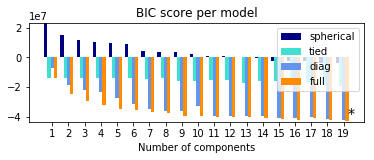

In [53]:
#So we have removed approximately 12 features
# Starting Gausian Mixture Model implementation
import matplotlib as mpl
import itertools
from sklearn import mixture
from scipy import linalg

lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
X = train_processed_selectedFeatures.drop(['labelsMapped'], 1)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.show()

In [55]:
lowest_bic = np.infty
bic = []
n_components_range = range(20, 25)
X = train_processed_selectedFeatures.drop(['labelsMapped'], 1)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.show()

KeyboardInterrupt: 

In [ ]:
#Setting up the evaluation system
testData = pd.read_csv("NSL_KDD_Dataset/KDDTest+.txt", header=None)

In [60]:
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=40,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [61]:
best_gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=40, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [63]:
gmm.bic(X)

-43407436.651723042

In [64]:
bic

[-4220899.4564292394,
 -5851404.2760897065,
 -4520210.9064426394,
 -4615095.9665765092,
 -4959846.7868160233,
 -18231260.09943039,
 -18737838.399032865,
 -18897951.265722055,
 -18941593.402753655,
 -19300339.342386656,
 -41811431.481958821,
 -41911057.562741175,
 -41824214.683998972,
 -41983865.187453926,
 -42148588.336940035,
 -8597372.0145241022,
 -8445733.5283411928,
 -8791670.3465592973,
 -8485397.5172638725,
 -9109081.9101259857,
 -20829572.700151149,
 -19700546.315771069,
 -20102506.170774478,
 -19951964.892339788,
 -19830674.002709374,
 -43804720.519945368,
 -43191772.609063648,
 -43622279.223832801,
 -43429771.510676332,
 -43076909.071385525,
 -43885426.605002865,
 -43738957.936275922,
 -43466820.918159373,
 -43449143.374223888,
 -43407436.651723042]